In [20]:
import numpy as np 
import pandas as pd
import json
import tweepy
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import datetime
import os


#::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
#:: Setting initinal parameters and creating the twitter API connection :::
#::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::


## Setting search parameters with the term and date. By default, using today's date. ##
search_term = "#Trump"
search_date = datetime.datetime.now().strftime("%Y-%m-%d")

## Opening twitter API credentials file - JSON format. ##
with open('/kaggle/input/twitter/twitter_credentials.json') as f:
    credentials = json.load(f)    

## Connecting to the Twitter API and passing the credentials. ##
auth = tweepy.OAuthHandler(credentials['consumer_key'],credentials['consumer_secret'])
auth.set_access_token(credentials['access_token'],credentials['access_token_secret'])
api = tweepy.API(auth)

In [18]:
#::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
#:: Pulling, parsing, scrubbing, and prepping tweet data to be passed into TextBlob package :::
#::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::


## this function accepts a text string and parses for a URL to be removed using the regular expressions package. It returns a string back to the caller with the URL removed.
def remove_url(text):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", text).split())

## setting the string to be passed into the cursor call, includes the filtering of retweets. ##
search_string = search_term +" -filter:retweets"

## creating the tweepy cursor iterator object, and executing the search. ##
tweet_block = tweepy.Cursor(api.search,q=search_term,lang="en",since=search_date).items(1000)

## iterates through each tweet object and passes the text to the remove_url function, to remove URLS from the text. ## 
tweets_no_urls = [remove_url(tweet.text) for tweet in tweet_block]

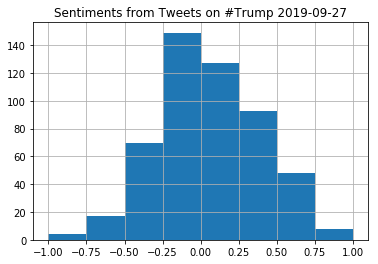

In [19]:
#:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
#:: Conducting the sentiment analysis via the TextBlob package and displaying it into a visual :::
#:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::


## passing each tweet into the TextBlob package for sentiment analysis. ##
textblob_tweet = [TextBlob(tweet) for tweet in tweets_no_urls]

## parsing the text of each tweet into a string, and then determining the polarity. ##
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in textblob_tweet]

## creating a dataframe of the polarity and tweet. ##
tweet_df = pd.DataFrame(sentiment_values, columns=["Polarity","Tweet"])

## removing "neutral" tweets from the dataframe. ##
tweet_df = tweet_df[tweet_df.Polarity != 0]

## displaying the distribution of negative vs. positive tweets via a histogram. ##
tweet_df.hist(bins=[-1.00,-0.75,-0.50,-0.25,0,0.25,0.50,0.75,1.00])
plt.title("Sentiments from Tweets on "+ search_term + " " + today)
plt.show()